In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import *
%matplotlib inline

df = pd.read_excel('Analyst_Data.xls', sheetname=4)
print(df.head(5))

   Номер троллейбуса Время прибытия  Количество человек
0                 31       20:00:00                  24
1                 51       20:00:00                  20
2                 27       20:01:00                  20
3                 31       20:03:00                  23
4                 27       20:05:00                  15


In [2]:
## find out unique numbers
df['Номер троллейбуса'].unique()

array([31, 51, 27])

In [3]:
from datetime import datetime, date
df['Interval'] = np.nan
for i in df['Номер троллейбуса'].unique():
    current_number_df = df[i == df['Номер троллейбуса']]
    t1 =  current_number_df['Время прибытия']
    t2 = []
    for j in range(len(t1)):
        if j == 0:
            t2.append(np.NaN)
        else:
            t2.append(datetime.combine(date.today(), t1.iloc[j]) -  datetime.combine(date.today(), t1.iloc[j-1]))
    df.loc[(df['Номер троллейбуса'] == i), 'Interval'] = t2

In [4]:
## convert timedelta to float

df['Interval'].loc[3:] = df['Interval'].loc[3:].apply(lambda x: x.total_seconds() / 60)
df

/Users/greg.fetisov/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Номер троллейбуса,Время прибытия,Количество человек,Interval
0,31,20:00:00,24,NaN
1,51,20:00:00,20,NaN
2,27,20:01:00,20,NaN
3,31,20:03:00,23,3
4,27,20:05:00,15,4
5,51,20:07:00,19,7
6,31,20:08:00,21,5
7,27,20:10:00,16,5
8,31,20:12:00,17,4
9,51,20:14:00,18,7


In [5]:
report =  pd.DataFrame(data=None, index=["Средний интервал движения, мин", "Отклонение от среднего интервала, мин", "Максимальное значение интервала, мин", "Среднее кол-во пассажиров, чел", "Суммарное кол-во пассажиров, чел"], columns=["Маршрут №27", "Маршрут №31", "Маршрут №51", "Все маршруты"])

In [6]:
report

,Маршрут №27,Маршрут №31,Маршрут №51,Все маршруты
"Средний интервал движения, мин",NaN,NaN,NaN,NaN
"Отклонение от среднего интервала, мин",NaN,NaN,NaN,NaN
"Максимальное значение интервала, мин",NaN,NaN,NaN,NaN
"Среднее кол-во пассажиров, чел",NaN,NaN,NaN,NaN
"Суммарное кол-во пассажиров, чел",NaN,NaN,NaN,NaN


In [7]:
list_func = [df.loc[(df['Номер троллейбуса'] == i), 'Interval'].mean(),
np.std(df.loc[(df['Номер троллейбуса'] == i), 'Interval']),
df.loc[(df['Номер троллейбуса'] == i), 'Interval'].max(),
df.loc[(df['Номер троллейбуса'] == i), 'Количество человек'].mean(),
df.loc[(df['Номер троллейбуса'] == i), 'Количество человек'].sum()]

In [8]:
report['Маршрут №27'] = [df.loc[(df['Номер троллейбуса'] == 27), 'Interval'].mean(),
np.std(df.loc[(df['Номер троллейбуса'] == 27), 'Interval']),
df.loc[(df['Номер троллейбуса'] == 27), 'Interval'].max(),
df.loc[(df['Номер троллейбуса'] == 27), 'Количество человек'].mean(),
df.loc[(df['Номер троллейбуса'] == 27), 'Количество человек'].sum()]

In [9]:
report['Маршрут №31'] = [df.loc[(df['Номер троллейбуса'] == 31), 'Interval'].mean(),
np.std(df.loc[(df['Номер троллейбуса'] == 31), 'Interval']),
df.loc[(df['Номер троллейбуса'] == 31), 'Interval'].max(),
df.loc[(df['Номер троллейбуса'] == 31), 'Количество человек'].mean(),
df.loc[(df['Номер троллейбуса'] == 31), 'Количество человек'].sum()]

In [10]:
report['Маршрут №51'] = [df.loc[(df['Номер троллейбуса'] == 51), 'Interval'].mean(),
np.std(df.loc[(df['Номер троллейбуса'] == 51), 'Interval']),
df.loc[(df['Номер троллейбуса'] == 51), 'Interval'].max(),
df.loc[(df['Номер троллейбуса'] == 51), 'Количество человек'].mean(),
df.loc[(df['Номер троллейбуса'] == 51), 'Количество человек'].sum()]

report

,Маршрут №27,Маршрут №31,Маршрут №51,Все маршруты
"Средний интервал движения, мин",4.916667,4.000000,7.00000,NaN
"Отклонение от среднего интервала, мин",0.759203,0.894427,2.12132,NaN
"Максимальное значение интервала, мин",6.000000,5.000000,11.00000,NaN
"Среднее кол-во пассажиров, чел",10.000000,14.000000,15.00000,NaN
"Суммарное кол-во пассажиров, чел",130.000000,224.000000,135.00000,NaN


In [11]:
report['Все маршруты'] = [report.loc['Средний интервал движения, мин'].mean(), report.loc['Отклонение от среднего интервала, мин'].mean(), report.loc['Максимальное значение интервала, мин'].max(), report.loc['Среднее кол-во пассажиров, чел'].mean(), report.loc['Суммарное кол-во пассажиров, чел'].sum()]

report

,Маршрут №27,Маршрут №31,Маршрут №51,Все маршруты
"Средний интервал движения, мин",4.916667,4.000000,7.00000,5.305556
"Отклонение от среднего интервала, мин",0.759203,0.894427,2.12132,1.258317
"Максимальное значение интервала, мин",6.000000,5.000000,11.00000,11.000000
"Среднее кол-во пассажиров, чел",10.000000,14.000000,15.00000,13.000000
"Суммарное кол-во пассажиров, чел",130.000000,224.000000,135.00000,489.000000


In [12]:
## round numbers
report = report.applymap(lambda x: float('%.2f' % x))

In [13]:
report

,Маршрут №27,Маршрут №31,Маршрут №51,Все маршруты
"Средний интервал движения, мин",4.92,4.00,7.00,5.31
"Отклонение от среднего интервала, мин",0.76,0.89,2.12,1.26
"Максимальное значение интервала, мин",6.00,5.00,11.00,11.00
"Среднее кол-во пассажиров, чел",10.00,14.00,15.00,13.00
"Суммарное кол-во пассажиров, чел",130.00,224.00,135.00,489.00


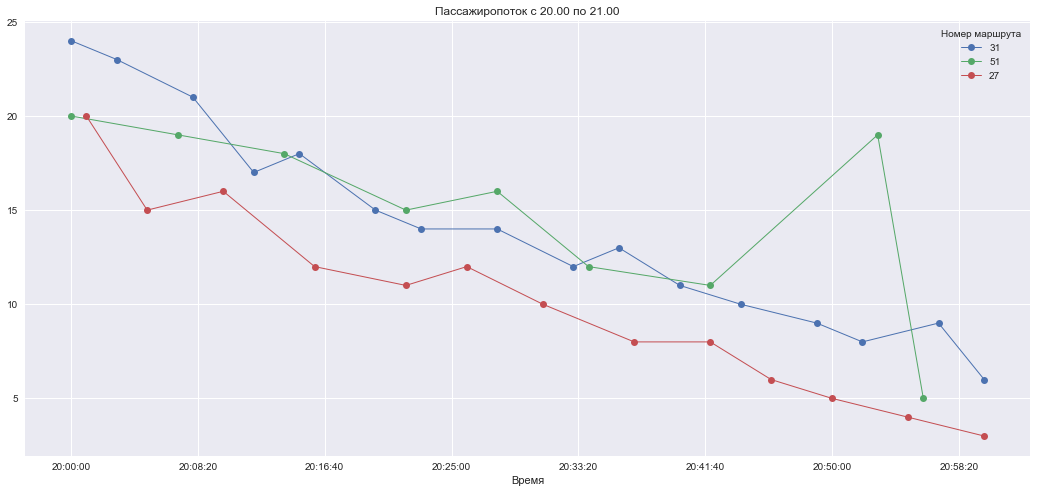

In [14]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
for i in df['Номер троллейбуса'].unique():
    current_number_df = df[i == df['Номер троллейбуса']]
    ax.plot(df.loc[(df['Номер троллейбуса'] == i), 'Время прибытия'], df.loc[(df['Номер троллейбуса'] == i), 'Количество человек'], label=i, linewidth=1, marker='o')
ax.legend(title='Номер маршрута')
ax.set_xlabel('Время')
ax.set_xlabel('Время')


ax.set_title("Пассажиропоток с 20.00 по 21.00")

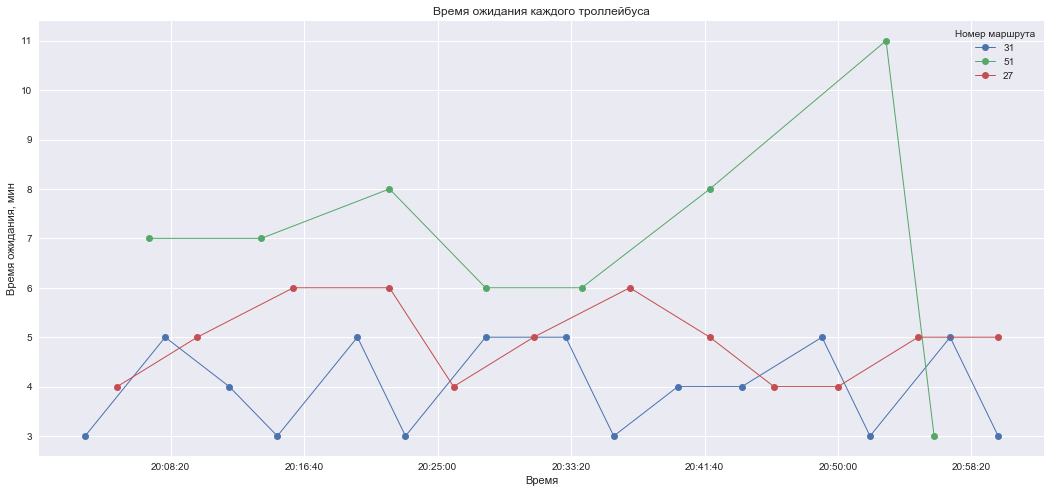

In [25]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
for i in df['Номер троллейбуса'].unique():
    current_number_df = df[i == df['Номер троллейбуса']]
    ax.plot(df.loc[(df['Номер троллейбуса'] == i), 'Время прибытия'], df.loc[(df['Номер троллейбуса'] == i), 'Interval'], label=i, linewidth=1, marker='o')
ax.legend(title='Номер маршрута')
ax.set_xlabel('Время')
ax.set_ylabel('Время ожидания, мин')


ax.set_title("Время ожидания каждого троллейбуса")

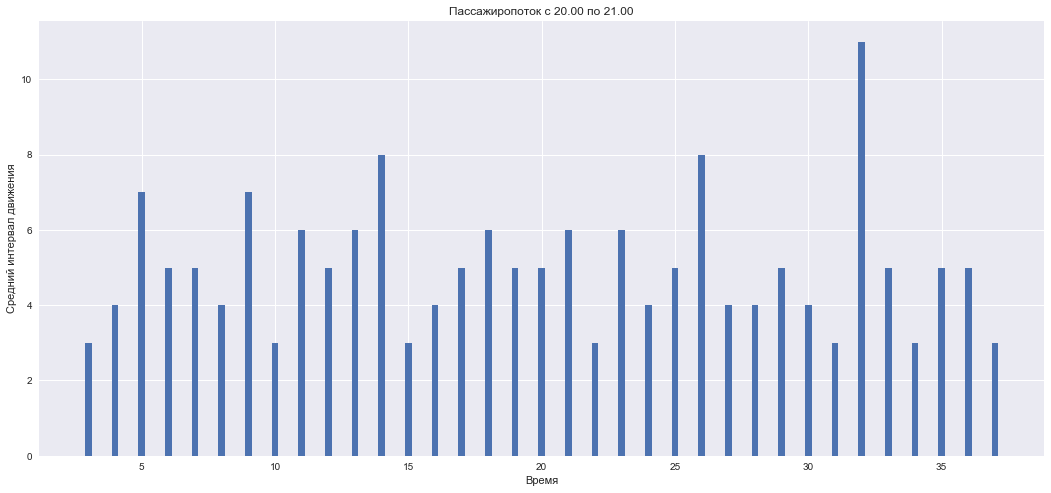

In [21]:
df['datetime'] = df['Время прибытия'].apply(lambda x: datetime.combine(date.today(), x))
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
pos = list(range(len(df['Interval']))) 
plt.bar(pos, df['Interval'], width = 0.25,)
ax.set_xlabel('Время')
ax.set_ylabel('Средний интервал движения')
ax.set_title("Пассажиропоток с 20.00 по 21.00")